In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

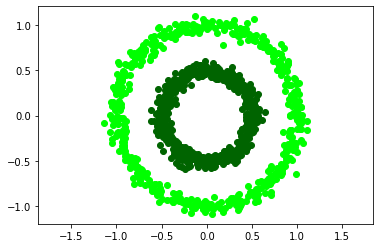

In [ ]:
d = 1000
c = 2

X, Y = make_circles(n_samples=d, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="lime")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="darkgreen")
plt.axis("equal")
plt.show()

In [ ]:
class neuronal_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur) * 2 - 1 #Queremos el valor entre -1 y 1, por eso multiplicamos y restamos
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

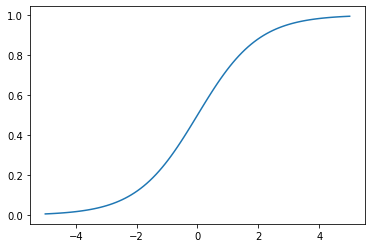

In [ ]:
#Funcion de activacion sigmoide

sigmoide = (lambda x: 1 / (1 + np.e ** (-x)),
            lambda x: x* (1-x))
            

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigmoide[0](_x))



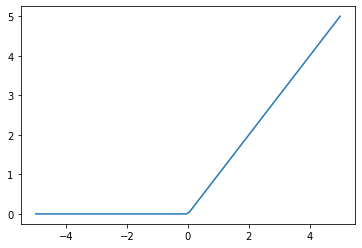

In [ ]:
def relu(X):
   return np.maximum(0,X)

plt.plot(_x, relu(_x))

In [ ]:
l0 = neuronal_layer(c, 4, sigmoide)
l1 = neuronal_layer(4, 8, sigmoide)

def create_nn(topology, act_f):

  nn = [] 

  for l, layer in enumerate(topology[:-1]):

    nn.append(neuronal_layer(topology[l], topology[l+1], act_f))

  return nn 

topology = [c, 4, 8, 1] #numeros de neurona de la red por capas

create_nn(topology, sigmoide)

In [ ]:
neural_net = create_nn(topology, sigmoide)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  for l, layer in enumerate(neural_net):

     z =  out[-1][1] @ neural_net[l].W + neural_net[l].b
     a = neural_net[l].act_f[0](z)
     out.append((z, a))

  if train:

    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]
      

      if l == len(neural_net) -1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ neural_net[l+1].W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]  

train(neural_net, X, Y, l2_cost, 0.5)
print("Correcto")

Correcto


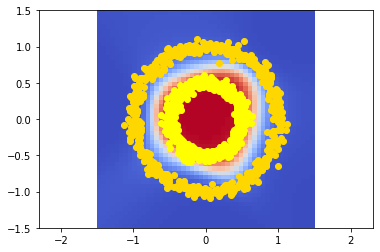

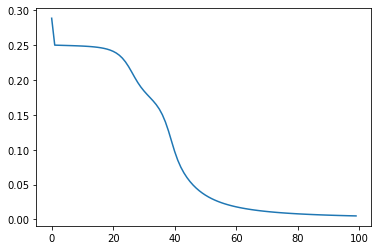

In [ ]:
import time
from IPython.display import clear_output

neural_n =  create_nn(topology, sigmoide)

loss = []

for i in range(2500):

  pY = train(neural_n, X, Y, l2_cost, lr=0.005)

  if i % 25==0:
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="gold")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="yellow")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.001)